In [60]:
# add autoreload
%load_ext autoreload
%autoreload 2
import sickle
from tqdm import tqdm
import os

import requests
import lxml
import bs4
import random
from time import sleep

import oai

import matplotlib.pyplot as plt


from collections import defaultdict
import pandas as pd

import dotenv
dotenv.load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [ ]:
import openai
import asyncio
from openai import AsyncOpenAI, OpenAI
openai.api_key = os.getenv("OPENAI_KEY")

In [22]:
source = 'UU'

In [ ]:
accepted_topiclist = ['athero', 
                        'plaque', 
                        'cardiovascular',
                        'cardiogram', 
                        'cardiologie',
                        'hartvaten',
                        'healthcare',
                        'klinisch',
                        'medische',
                        'hartvaat',
                        'heart', 
                        'vascular',
                        'angiogram', 
                        'cardiologie', 
                        'hartziekte', 
                        'vaatziekte',
                        'medicine',
                        'disease', 
                        'medical', 
                        'therapy',
                        'therapeutic',
                        'diagnosic',
                        'clinical',
                        'surgical', 
                        'oncology',
                        'psychiatry',
                        'psychology',
                        'neurology',
                        'rheumatology',
                        'immunology',
                        'inflammation',
                        'diabetes',
                        'cancer',
                        'tumor',
                        'carcinoma',
                        'metastasis',
                        'metastatic',
                        'diagnostic',
                        'pharmacology',
                        'pharmaceutical',
                        'toxicology',
                        'epidemiology',
                        'genetics',
                        'genomic',
                        'genome',
                        'proteomic',
                        'proteome',
                        'biomarker',
                        'biomolecular',
                        'biochemical',
                        'biological',
                        'pathology',
                        'pathogen',
                        'virology',
                        'bacteriology',
                        'microbiology',
                        'immunology',
                        'neuroscience',
                        'neurodegenerative',
                        'cardiology',
                        'cardiovascular',
                        'cardiomyopathy',
                        'arrhythmia',
                        'hypertension',
                        'atherosclerosis',
                        'stroke',
                        'diabetes',
                        'obesity',
                        'metabolism',         
                        'metabolic',
                        'myocard']

# accepted_topiclist = ['recht', 'wetten', 'juridisch',
#                       'rechtspraak', 'verordering', 'wetgeving',
#                       'richtlijn',
#                       'regelgeving',
#                       'wetboek', 'bevoegdheid', 'toezicht',
#                       'wetboek', 'jurisprudentie', 
#                       'precedent', 'wet bibop',
#                       'wetboek van strafrecht',
#                       'wetboek van strafvordering']

accepted_dtypes = ['doctoral', 'book', 'article']
accepted_languages = ['nl','nld','dut', 'und','en', 'eng'] 


base_url =   oai.sources[source]['link'] #'https://repository.ubn.ru.nl/oai/openaire'  https://scholarlypublications.universiteitleiden.nl/oai2, http://dspace.library.uu.nl/oai/dissertation
#pdf_path = f'//Ds/data/LAB/laupodteam/AIOS/Bram/language_modeling/MEDICAL_TEXT/RAW/PhDTheses/{source}/'
#pdf_path = f'/media/koekiemonster/DATA-FAST/text_data/pubscience/PDF/' 
pdf_path = f'T://laupodteam/AIOS/Bram/language_modeling/MEDICAL_TEXT/RAW/PRETRAINING/PhDTheses/{source}/'

In [24]:
OpenAIRE_institutes = ['VU', 'UVA', 'Maastricht',
                       'Tilburg', 'RUG', 'UTwente', 
                       'TUE', 'UU', 'Erasmus', 'UK']

In [25]:
sickler = sickle.Sickle(base_url)

In [26]:
sets = sickler.ListSets()

In [27]:
Sets = {}
for s in sets:
    Sets[s.setSpec]  = s.setName    

In [28]:
len(Sets)

35

In [29]:
keywords = ['clinical', 'medisch', 'medical', 'healthcare', 'dissertation', 'umc', 'medicine',
            'diss', 'phd', 'thesis', 'doctorate', 'dissertatie', 'dissertation', 'doctoralthesis', 'health',
            'doctoraat', 'proefschrift', 'cambridge', 'oxford', 'edinburgh', 'hospital',
            'ucl', 'kings college', 'brunel', 'imperial college', 'london school of hygiene',]

keywords = keywords + accepted_topiclist

In [30]:
if source in OpenAIRE_institutes:
    keywords = keywords + ['publications:withfiles']

Sets_to_mine = []
All_set = list(Sets.keys())
val_list = []
for key, val in Sets.items():
    if any([c in val.lower() for c in keywords]) | any([c in key.lower() for c in keywords]):
        print(f'Set: {key} contains keyword')
        print(key,val)
        Sets_to_mine.append(key)
    
    if any([c in key.lower() for c in keywords]) | any([c in key.lower() for c in keywords]):
        print(f'Set: {key} contains keyword')
        print(key,val)
        Sets_to_mine.append(key)
    val_list.append(val)

Set: dissertation contains keyword
dissertation Dissertations set
Set: dissertation contains keyword
dissertation Dissertations set
Set: com_1874_298213 contains keyword
com_1874_298213 UMC Repository
Set: col_1874_298214 contains keyword
col_1874_298214 UMC Repository


In [33]:
len(All_set),  len(Sets_to_mine)

(35, 4)

In [32]:
# get records 
# Beware: this takes a long time.
from collections import defaultdict
records_lists = defaultdict(list)
for k, set_to_mine in enumerate(Sets_to_mine):
    #if set_to_mine in ['com_1874_298213']:
    #    continue
    print(f"Mining from set: {set_to_mine}, {k+1} out of {len(Sets_to_mine)}")
    try:
        records = sickler.ListRecords(metadataPrefix='oai_dc', 
                                    ignore_deleted=True, 
                                    set=set_to_mine) 
        for record in tqdm(records):
            records_lists[set_to_mine].append(record)
    except Exception as e:
        print(e)
        continue

Mining from set: dissertation, 1 out of 4


11239it [08:08, 22.99it/s]


Mining from set: dissertation, 2 out of 4


11239it [07:20, 25.49it/s]


Mining from set: com_1874_298213, 3 out of 4


3909it [03:04, 21.20it/s]


Mining from set: col_1874_298214, 4 out of 4


3909it [02:48, 23.14it/s]


In [34]:
sum([len(v) for k,v in records_lists.items()])

30296

## Semantic search

1. generic bi-encoder model
2. generate seed-phrases from the search terms using GPT4
3. use the seed-phrases to search for similar documents


In [38]:
# generate seed phrases with GPT-4
N_phrases = 50
seed_keywords = accepted_topiclist
language='Dutch'
# make seed phrases
#

prompt = f"""Please, make {N_phrases} sentences related to the list of keywords that is provided by the user.\n.
Requirements: \n
The output MUST be in {language}. \n
The output MUST ONLY contain the the list created sentences, seperated by a newline.
"""

OAI_ASYNC_CLIENT = AsyncOpenAI(api_key=os.getenv("OPENAI_KEY"), max_retries=2)
OAI_CLIENT = OpenAI(api_key=os.getenv("OPENAI_KEY"), max_retries=2)


def get_chat_res(USER_TEXT='Good day', 
                 SYSTEM_PROMPT=prompt, 
                 n = 1,
                 MODEL="gpt-4"):
    return OAI_CLIENT.chat.completions.create(
            model=MODEL,
            n = n,
            messages=[
                        {"role": "system",
                        "content": SYSTEM_PROMPT
                        },
                        {"role": "user", 
                        "content": USER_TEXT
                        }],
            stream=False,
        )
    
GPT_VERSION = 'gpt-5-mini'


In [39]:
phrases = get_chat_res(USER_TEXT="\n".join(seed_keywords), 
                       SYSTEM_PROMPT=prompt,
                       n=1,
                       MODEL=GPT_VERSION)

In [40]:
SEED_PHRASES = phrases.choices[0].message.content.split('\n')

In [ ]:
# TODO ADD SEMANTIC SEARCH 
from sentence_transformers import SentenceTransformer

# 'paraphrase-multilingual-mpnet-base-v2'

if language == 'Dutch':
    model_name = 'NetherlandsForensicInstitute/robbert-2022-dutch-sentence-transformers'
elif language == 'English':
    model_name = 'all-MiniLM-L6-v2'

SBERT = SentenceTransformer(model_name)

In [47]:
filtered_records_lists = defaultdict(list)
excluded_records_lists = defaultdict(list)

cond_list = []

RAW_MINE_RESULTS = {}

topic_dict = defaultdict(int)
for set_to_mine in Sets_to_mine:
    relevant_counter = 0
    for idx, r in tqdm(enumerate(records_lists[set_to_mine])):
        _id = f'{set_to_mine}_{idx}'
        meta = r.get_metadata()
        relevant = False
        
        TOPIC = False
        PDF = False
        DOCTORATE = True if 'dissertation' in set_to_mine.lower() else False
        EMBARGO = False
        LANG = False
        
        try:
            _lang = meta['language'][0]
            if _lang is None:
                _lang = 'unknown'
        except KeyError:
            _lang = 'unknown'
            
        if _lang.strip().lower() in accepted_languages:
            LANG = True
        

        if source in ['Radboud']: 
            PDF=True
        
        try:
            for t in meta['subject']:
                topic_dict[t.lower()] += 1
            _subj = ",".join(meta['subject'])
            if any([t in _subj.lower() for t in accepted_topiclist]):
                TOPIC = True
        except:
            _subj = ""
            pass

        try:
            _title = meta['title']
            if any([t in subj.lower() for subj in _title for t in accepted_topiclist]):
                TOPIC = True
        except:
            _title = ""
            pass

        try:
            _description = meta['description']
            if any([t in subj.lower() for subj in _description for t in accepted_topiclist]):
                TOPIC = True
        except:
            _description = ""
            pass                        
        
        try:
            _format = meta['format'][0].lower()
            if ('pdf' in _format):
                PDF = True
        except:
            _format = ""
            pass
        
        try:
            _type = meta['type'][0].lower()
            if any([t in _type for t in accepted_dtypes]):
                DOCTORATE = True
        except:
            _type = ""
            pass

        try:
            _rights = meta['rights'][0].lower()
            if ('embargo' in _rights) |\
                    ('restricted' in _rights):
                EMBARGO = True
        except:
            _rights = ""
            pass  
        
        try:
            _date = meta['date'][0].lower()
        except:
            _date = ""
            pass
        
        RAW_MINE_RESULTS[_id] = {                
                                'LANG': _lang,
                                'TOPIC': _subj,
                                'TITLE': _title,
                                'DESCRIPTION': _description,            
                                'FORMAT': _format,
                                'TYPE': _type,
                                'RIGHTS': _rights,
                                'DATE': _date,
                                'TOPIC_OF_INTEREST': TOPIC,
                                'META': meta
                              }
        
        
        cond_list.append({'Topic': TOPIC, 
                          'Topic_string': _subj,
                          'PDF': PDF, 
                          'Doctorate': DOCTORATE, 
                          'Embargo': EMBARGO,
                          'LANG': LANG}
                         )
        
        if TOPIC & PDF & DOCTORATE & EMBARGO==False:
            relevant_counter += 1
            filtered_records_lists[set_to_mine].append(r)
        else:
            excluded_records_lists[set_to_mine].append(r)

    print(f'Found {relevant_counter} relevant records in set: {set_to_mine}')      

22478it [00:18, 1232.80it/s]


Found 22296 relevant records in set: dissertation


22478it [00:17, 1259.78it/s]


Found 22296 relevant records in set: dissertation


3909it [00:02, 1429.57it/s]


Found 3909 relevant records in set: com_1874_298213


3909it [00:03, 1280.39it/s]

Found 3909 relevant records in set: col_1874_298214


In [48]:
# sort topics by frequency
topic_dict = dict(sorted(topic_dict.items(), key=lambda item: item[1], reverse=True))

print(topic_dict)

{'geneeskunde': 4174, 'econometric and statistical methods: general': 1738, 'geneeskunde(genk)': 1726, 'bescherming en bevordering van de menselijke gezondheid': 1490, 'medical sciences': 1406, 'aardwetenschappen': 1256, 'natuur- en sterrenkunde': 820, 'diergeneeskunde': 732, 'biologie': 644, 'scheikunde': 612, 'sociale wetenschappen': 590, 'farmacie': 574, 'mri': 572, 'epidemiology': 554, 'cancer': 538, 'geneeskunde (genk)': 528, 'wiskunde en informatica': 496, 'letteren': 476, 'overig maatschappelijk onderzoek': 388, 'farmacie(farm)': 376, 'children': 368, 'earth sciences': 360, 'specialized histories (international relations, law)': 360, 'literary theory, analysis and criticism': 360, 'culturele activiteiten': 360, 'inflammation': 354, 'geowetenschappen en aanverwante (milieu)wetenschappen': 332, 'biomedische technologie en medicijnen': 328, 'treatment': 316, 'breast cancer': 312, 'genetics': 302, 'biomarkers': 292, 'quality of life': 282, 'cardiovascular disease': 280, 'development

In [50]:
excluded_num = sum([len(v) for v in excluded_records_lists.values()])
included_num = sum([len(v) for v in filtered_records_lists.values()])
print(f'Included {included_num} records, excluded {excluded_num} records')

Included 52410 records, excluded 364 records


In [51]:
# Collect the embeddings
for k, doc in tqdm(RAW_MINE_RESULTS.items()):
    TEXT = " ".join(doc['TITLE']) + " ".join(doc['DESCRIPTION'])
    EMB = SBERT.encode(TEXT)
    RAW_MINE_RESULTS[k]['EMB'] = EMB

100%|██████████| 30296/30296 [07:35<00:00, 66.57it/s] 


In [52]:
SEED_PHRASE_EMBEDDINGS = {}
for i,d in enumerate(SEED_PHRASES):
    SEED_PHRASE_EMBEDDINGS[i] = SBERT.encode(d)

In [53]:
from scipy.spatial.distance import cosine
cos_sim = lambda x,y: 1-cosine(x,y)

In [57]:
# get the most similar seed phrase
for k, doc in tqdm(RAW_MINE_RESULTS.items()):
    SIMILARITY = []
    for i, seed_emb in SEED_PHRASE_EMBEDDINGS.items():
        SIMILARITY.append(cos_sim(seed_emb, doc['EMB']))
    RAW_MINE_RESULTS[k]['SIMILARITY'] = SIMILARITY

100%|██████████| 30296/30296 [00:14<00:00, 2152.91it/s]


In [59]:
all_sims =  [sim for r in RAW_MINE_RESULTS.values() for sim in r['SIMILARITY']]

In [63]:
all_geneeskunde_sims = [sim for k,r in RAW_MINE_RESULTS.items() if 'geneeskunde' in r['TOPIC'].lower() for sim in r['SIMILARITY']]

In [68]:
all_economie_sims = [sim for k,r in RAW_MINE_RESULTS.items() if 'econometric' in r['TOPIC'].lower() for sim in r['SIMILARITY']]

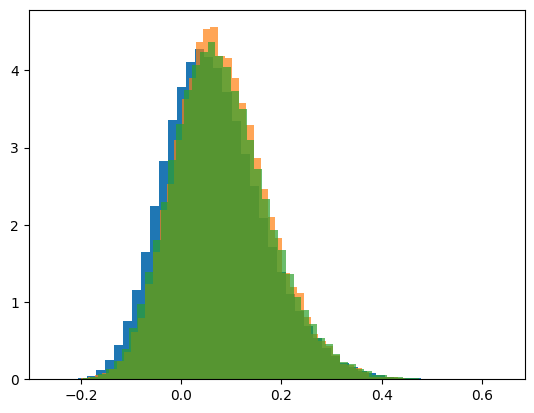

In [71]:
plt.hist(all_sims, bins=50, density=True);
plt.hist(all_economie_sims, bins=50, density=True, alpha=0.7);
plt.hist(all_geneeskunde_sims, bins=50, density=True, alpha=0.7);


In [72]:
sem_filtered =  []
for k, doc in tqdm(RAW_MINE_RESULTS.items()):
    if any([s > 0.50 for s in doc['SIMILARITY']]):
        sem_filtered.append(k)    
len(sem_filtered)

100%|██████████| 30296/30296 [00:00<00:00, 236057.82it/s]


130

In [73]:
seed_emb_df = pd.DataFrame.from_dict({f'{k}_SEED':v 
                                      for k,v in SEED_PHRASE_EMBEDDINGS.items()}, orient='index')

result_emb_df = pd.DataFrame.from_dict({k:v['EMB'] 
                                        for k,v in RAW_MINE_RESULTS.items()}, 
                                     orient='index')

In [75]:
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt

In [76]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(result_emb_df.values)
pca_seed_result = pca.transform(seed_emb_df.values)

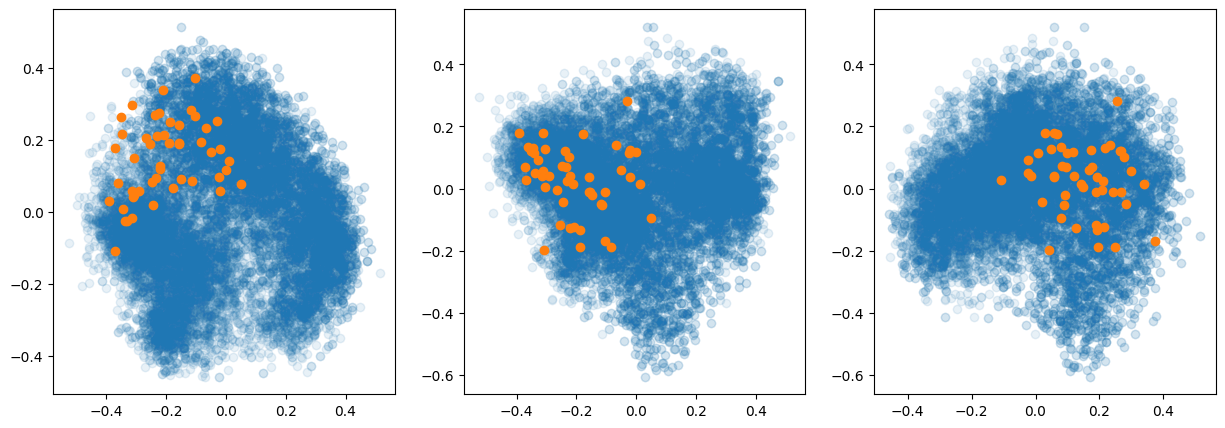

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].plot(pca_result[:,0], pca_result[:,1], 'o', alpha=0.05)
ax[0].plot(pca_seed_result[:,0], pca_seed_result[:,1], 'o', alpha=1.0)

ax[1].plot(pca_result[:,0], pca_result[:,2], 'o', alpha=0.05)
ax[1].plot(pca_seed_result[:,0], pca_seed_result[:,2], 'o', alpha=1.0)

ax[2].plot(pca_result[:,1], pca_result[:,2], 'o', alpha=0.05)
ax[2].plot(pca_seed_result[:,1], pca_seed_result[:,2], 'o', alpha=1.0)

In [80]:
types_counts = defaultdict(int)
for r in excluded_records_lists['publications:withFiles']:
    try:
        types_counts[r.metadata['type'][0]] += 1
    except:
        pass

In [81]:
types_counts

defaultdict(int, {})

In [82]:
conds_df = pd.DataFrame(cond_list)

In [83]:
conds_df.sum()

Topic                                                       32098
Topic_string    Wijsbegeerte,conformance testing,protocol data...
PDF                                                         39322
Doctorate                                                   44958
Embargo                                                       984
LANG                                                        47322
dtype: object

In [84]:
tot_theses_with_pdf = (conds_df.Doctorate & conds_df.PDF).sum()
print(f"Total number of theses with PDF: {tot_theses_with_pdf}")

Total number of theses with PDF: 33858


In [ ]:
link_list = []
error_list = []

for set_to_mine in filtered_records_lists.keys():
    for record in tqdm(filtered_records_lists[set_to_mine]):
        META = record.get_metadata()
        try:
            List_of_identifiers = META['identifier'] if 'identifier' in META.keys() else ['']
            Title = META['title'] if 'title' in META.keys() else ['']
            Description = META['description'] if 'description' in META.keys() else ['']
            Date = META['date'] if 'date' in META.keys() else ['']
            Language = META['language'] if 'language' in META.keys() else ['']       
            Creator = META['creator'] if 'creator' in META.keys() else ['']
            
            
            List_of_identifiers = [id for id in List_of_identifiers if id is not None]
            
            if len(List_of_identifiers)>0:
                link_list.append({'Set': set_to_mine, 
                                'Link': List_of_identifiers, 
                                'Title': Title,
                                'Description': Description,
                                'Date': Date ,
                                'Language': Language,
                                'Creator': Creator,
                                'Publisher': META.get('publisher'),
                                }
                                )
            else:
                continue
        except Exception as e:
            error_list.append(f"Error parsing {e}: {META}: ")
            pass

In [ ]:
publisher_counts = defaultdict(int)
for r in link_list:
    try:
        publisher_counts[r['Publisher']] += 1
    except:
        pass
publisher_counts

In [ ]:
link_list[500]

In [ ]:
import re

In [ ]:
def get_pdfs_Leiden(url):
    try:
        r = requests.get(url, timeout=10)
        # random number between 0.5 and 2.5 seconds
        rndSleep = round(random.uniform(1, 5), 2)
        sleep(rndSleep)
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        found, dsfound, esfound = False, False, False
        for _res in soup.findAll('li', {'class':'ubl-file-view'}):
            if _res.a is not None:
                if _res.a.contents[0].strip().lower() == 'full text':
                    _pdfdir = _res.a['href']
                    found = True
                elif _res.a.contents[0].strip().lower() == 'summary in dutch':
                    _dutch_summary = _res.a['href']
                    dsfound = True
                elif _res.a.contents[0].strip().lower() == 'summary in english':
                    _english_summary = _res.a['href']
                    esfound = True

        linkPdfAlt = f"https://scholarlypublications.universiteitleiden.nl{_pdfdir}" if found else None
        DutchSummaryLink = f"https://scholarlypublications.universiteitleiden.nl{_dutch_summary}" if dsfound else None
        EnglishSummaryLink = f"https://scholarlypublications.universiteitleiden.nl{_english_summary}" if esfound else None
        
        return linkPdfAlt, DutchSummaryLink, EnglishSummaryLink, r.status_code
    except Exception as e:
        return None, None, None, None

In [ ]:
def extract_pdf_links(links, institute=None):
    pdf_links = []
    if institute in ['VU', 'UVA', 'UTwente']:
        inclusion_terms = [r'abstract', r'full', r'complete', r'samenvatting', r'summary', r'thesis', r'chapter']
    elif institute in ['Radboud']:
        inclusion_terms = [r'handle', r'bitstream']
    elif institute in ['Maastricht']:
        inclusion_terms = [r'ASSET1', r'c[0-9]{3,4}\.pdf']
    elif institute in ['Tilburg']:
        inclusion_terms = [r'\.pdf']
    elif institute in ['RUG']:
        inclusion_terms = [r'summ\.pdf', r'summary\.pdf',  r'samenv\.pdf', r'samenvat\.pdf', r'[ch][0-9]{1,2}\.pdf', 
                           r'thesis\.pdf', r'proefschrift\.pdf', r'dissertation\.pdf', r'dissertatie\.pdf']
    elif institute in ['TUE']:
        inclusion_terms = [r'summ\.pdf', r'summary\.pdf',  r'samenv\.pdf', r'samenvat\.pdf', r'[ch][0-9]{1,2}\.pdf', 
                           r'thesis\.pdf', r'proefschrift\.pdf', r'dissertation\.pdf', r'dissertatie\.pdf']
        inclusion_terms = inclusion_terms + [r'abstract', r'full', r'complete', r'samenvatting', r'summary', r'thesis', r'chapter']
    elif institute in ['UU']:
        inclusion_terms = [r'dspace\.library\.uu\.nl']
    elif institute in ['Leiden']:
        inclusion_terms = [r'handle']
    elif institute in ['Erasmus']:
        inclusion_terms = [r'files']
    else:
        raise ValueError(f'Institute {institute} not recognized')
    
    inclusion_terms = [re.compile(rs) for rs in inclusion_terms]
    
    if institute in ['UU']:
        _pdf_links = []
        for link in links:
            if (link.lower().startswith('http')):
                baselink = link.replace('dspace.library.uu.nl/', 'dspace.library.uu.nl/bitstream/')
                _pdf_links.append(baselink + '/full.pdf')
        pdf_links = _pdf_links
    elif institute in ['Leiden']:
        _pdf_links = []
        for link in links:
            if (link.lower().startswith('http')) & (any([t.search(link) is not None for t in inclusion_terms])):
                main, dutch_summ, engl_summ, return_code = get_pdfs_Leiden(link)
                if return_code == 429:
                    print("Too many requests. Waiting 60 seconds")
                    sleep(60)
                else:
                    _pdf_links.extend([main, dutch_summ, engl_summ])
        pdf_links = [l for l in _pdf_links if l is not None]
    else:
        for link in links:
            if (link.lower().startswith('http')) & \
                    (link.lower().endswith('.pdf')):
                if any([t.search(link) is not None for t in inclusion_terms]):
                    pdf_links.append(link)        

    return pdf_links

In [ ]:
len(link_list)

In [ ]:
link_pdf_list = []
for l in tqdm(link_list):
    links = extract_pdf_links(l['Link'], institute=source)
    tmp = []
    for _l in links:
        Creator = l['Creator'][0] if l['Creator'][0] is not None else 'Unknown'
        Date = l['Date'][0] if l['Date'][0] is not None else 'Unknown'
        
        pdfPath = _l.split("/")[-1].replace("%20", "_").rstrip('.pdf')
        pdfPath = source + "_" + Creator + "_" + Date + "_" + pdfPath
        pdfPath = pdfPath.replace(",", "")
        pdfPath = pdfPath.replace(":", "")
        pdfPath = pdfPath.replace(".", "")
        pdfPath = pdfPath.replace(" ", "")
        pdfPath = os.path.join(pdf_path, pdfPath+".pdf")
        tmp.append((_l, pdfPath))
    if len(tmp)==0:
        continue
    l['pdf_links'] = tmp
    link_pdf_list.append(l)

In [ ]:
len(link_pdf_list)

In [ ]:
# remove duplicate entries, based on the title
title_set = set()
unique_link_list = []
for el in link_pdf_list:
    try:
        title = el['Title'][0]
        if title not in title_set:
            unique_link_list.append(el)
            title_set.add(title)
    except Exception as e:
        pass

In [ ]:
len(unique_link_list)

In [ ]:
# now we parse the link list and download the pdfs
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.107 Safari/537.36' }

# add sleep
def pdf_writer(pdf_url, _pdf_path):
    r = requests.get(pdf_url, stream=True)
    if r.status_code == 200:
        with open(_pdf_path, 'wb') as f:
            for i,chunk in enumerate(r.iter_content(chunk_size=1024)): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
        return True, 200
    else:
        return False, r.status_code

In [ ]:
if source=='Radboud':
    filelist = os.listdir(pdf_path)
    pre_list = [f.split("_")[-1] for f in filelist]
if source=='UU':
    filelist = os.listdir(pdf_path)
    pre_list = [f.split(".")[-2] for f in filelist]

pdf_error_list = []
skipped_list = []
src_list = []
rcode_list = []
success_list = []
extract_full_text = True
for link in tqdm(unique_link_list):
    for lt in link['pdf_links']:
        _pdf_path = lt[1]
        pdf_url = lt[0]
        return_code = None

        if source=='Radboud':
            if _pdf_path.split("_")[-1] in pre_list:
                skipped_list.append(f'Pdf already exists: {_pdf_path}')
                continue
        if source=='UU':
            if link['pdf_links'][0][0].split("/")[-2] in pre_list:
                skipped_list.append(f'Pdf already exists: {_pdf_path}')
                continue
            
        if os.path.isfile(_pdf_path):
            skipped_list.append(f'Pdf already exists: {_pdf_path}')
        else:
            # try to download the pdf
            try:
                write_file, return_code = pdf_writer(pdf_url, _pdf_path)
                success_list.append(f'Pdf downloaded: {_pdf_path}')
            except Exception as e:
                pdf_error_list.append(f'Error: {e} for link: {link["Link"]}')  

            if return_code == 429:
                print(f'Rate limit exceeded...sleeping 30 seconds')
                sleep(30)
                continue
            else:
                sleep(4)


In [ ]:
print(f'Found {len(pdf_error_list)} errors while downloading pdfs')
print(f'Skipped {len(skipped_list)} pdfs because they already existed')